## Boletín de problemas III


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

Noviembre 2021


In [2]:
import time
print(' Last version ', time.asctime() )

 Last version  Mon Nov 18 10:28:45 2024


In [3]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.constants as units

-----

**ejercicio 1**

Para medir la sección eficaz de la interacción $\pi^+ + p$ enviamos un haz de $\pi^+$ de 20 GeV de energía a un tanque de longitud $L = 1$ m, que en una primera configuración está vacío y luego lleno de hidrógeno líquido, y medimos los flujos tras el tanque normalizados al mismo flujo incidente y obtenemos $N_0 = 7.5 \times 10^5$ y $N_H = 6.9 \times 10^5$ respectivamente. Calcula la sección eficaz y su error estadístico. Datos: $\rho_H = 60$ $\mathrm{kg/cm}^3$ 


*solución*


El número de eventos después del tanque es $N_0$ y $N_H$, luego el número de eventos que se han producido al pasar el tanque con H es
 $N_0 - N_H$

luego:

$$
\sigma = \frac{(N_0 - N_H)}{L} \frac{M_H}{N_A \rho_H}
$$

donde $n = N_A \rho_H/M_H$, $N_A$ el número de Avogadro, y $M_H$ la masa molar del Hidrógeno. 

El error estará asociado al error en el número de eventos que viene dado por $\sqrt{N_0 + N_H}$

In [6]:
N0  = 7.5e5
NH  = 6.9e5
NA  = units.N_A
L   = 100 # cm
rho = 60e3 # g/cm3
MH  = 2.015 #g/mol

sigma = ((N0 - NH)/L) * (MH/(NA*rho)) # cm2
print('sigma {:1.2e} b'.format(sigma * 1e24))
usigma = (np.sqrt(N0 + NH)/L) * (MH/(NA*rho)) # cm2
print('error estadístico {:1.2e} b'.format(usigma * 1e24))


sigma 3.35e-02 b
error estadístico 6.69e-04 b


-----

**ejercicio 2**

Los muones de alta energía pierden energía atravesando la materia según:

$$
\frac{1}{\rho} \frac{\mathrm{d}E}{\mathrm{d}x} \simeq a + b \,E 
$$

donde $a \simeq 2.5 \; \mathrm{MeV \, cm^2 /g}$ está asociado a la pérdida por ionización y $b \simeq 3.5 \times 10^{-6} \, \mathrm{cm^2/g}$ a Bremsstrahlung para el caso de tratarse de roca. Considerar $A = 22, \; Z=11$ y $\rho = 2.65 \; \mathrm{g/cm^3}$.

¿A qué energía la pérdida de energía por ionización es igual a la de Bremsstrahlung? ¿Cuanta distancia recorre en promedio un muon cósmico de 100 GeV en roca?

*solución*

La energía a la que son comparables es: $ a = b E \to E  = a/b$

La pérdida de energía por distancia de un muón de $E = 100$ en la roca es:

$$
\frac{\mathrm{d}E}{\mathrm{d}x} \simeq (a + b \,E) \rho
$$

Luego la distancia hasta que se detenga considerando la pérdida siempre similar

$$
\mathrm{d}x = \frac{\mathrm{dE}}{(a + b E) \rho}
$$

$$
L = \frac{1}{\rho b} \ln{\frac{a + b E}{a}}
$$

In [35]:
a = 2.5 # MeV cm2/g
b = 3.5e-6 # cm2/g

print("Energy {:1.2f} GeV".format((a/b) * 1.e-3))

Energy 714.29 GeV


In [41]:
Emu = 100e3 # MeV
rho = 2.65 # g/cm3
dEdx = (a + b * Emu) * rho # MeV/cm
print('dE/dx {:1.2f} MeV/cm'.format(dEdx))
L = (np.log((a + b * Emu)/a))/(rho*b)
print('length {:1.2f} m'.format(L * 1e-2))

dE/dx 7.55 MeV/cm
length 141.27 m


----

**ejercicio 3**

Calcula la distancia que deben recorrer en Pb un haz 10 GeV de muones, fotones y neutrinos. Considerar la sección eficaz del neutrino $\sigma = 10^{-46}$ $\mathrm{cm}^{2}$, la densidad del Pb $\rho = $ y su longitud de radiación $X_0 = 0.56$ cm.

----

**ejercicio 4**

Considera dos partículas de masas $m_1, m_2$ con el mismo momento $p$, si situamos dos detectores de centelleo a una distancia $L$ que las partículas atriesan perpendicularmente, ¿Cuál es la diferencia temporal entre la llegada de las dos partículas al segundo centelleador? Si la resolución temporal de los centelleadores es de 300 ps, ¿A qué distancia deben estar situados los centelleadores para separar $\pi$ de $K$ de 4 GeV de momento a 3 desviaciones estándar?

*solución*

La velocidad de una partícula es:

$$
\beta = \frac{p}{E} = \frac{p}{\sqrt{p^2 +m^2}} = \frac{1}{\sqrt{1+(m/p)^2}}  \simeq1 - \frac{m^2}{2p^2}
$$

La diferencia del tiempo de llegada al segundo centelleador es:

$$
\Delta t = L \frac{m^2_2 - m^2_1}{p^2}
$$

Y para separar las dos partículas si la resolución es $\sigma$, exigimos $\Delta t \gt 3 \sigma$

In [11]:
m_pi = 0.139 # GeV
m_K  = 0.493 # GeV
pp   = 4     # GeV
sigma = 300e-12 # s
nn   = 3 # number of sigmas
cc   = 3e8 # m/s

L = 2 * nn * sigma * cc * (pp**2)/(m_K**2 - m_pi**2)
print('distance L ', L)


distance L  38.61832224844454


----

**ejercicio 5**

Considera un espectrométro de longitud $L$ y campo magnético $B$ y tres cámaras de detección situadas antes, en el medio y después del espectrómetro, que nos permiten estimar la sagitta $s = x_2 - (x_3+x_1)/2$, calcula el momento transverso de la partícula y su incertidumbre si la resolución de cada cámara es $\sigma_x$. Considerar $\theta$ pequeño.

<img src="./imgs/prob_sagitta.png" width = 200 align = "center">


*solución*

La relación entre el momento transverso, $p_T$ (GeV), el campo magnético $B$ (T) y el radio de curvatura es $R$ (m)

$$
p_T = 0.3 B R
$$

por otro lado la relación entre la sagitta y su ángulo, si $\theta$ pequeño:

$$
s = R (1- \cos \theta/2) \simeq \frac{R \theta^2}{8}, \;\;\; L = 2 R \sin \theta/2 \simeq R \theta
$$

luego

$$
s = R \frac{L^2}{8R^2} = \frac{L^2}{8 R} = 0.3 \frac{BL^2}{8 p_T}
$$

esto es:

$$
p_T = 0.3 \frac{BL^2}{8s}
$$


La resolución en $p_T$

$$
\sigma_{p_T} = p_T \frac{\sigma_s}{s} \to \frac{\sigma_{p_T}}{p_T} = \frac{\sigma_s}{s}
$$

y la incertidumbre en la sagitta:

$$
s = \sqrt{3} \sigma_x
$$

luego:

$$
\sigma_{p_T} = 0.3 \frac{BL^2}{8s^2} \sqrt{3} \sigma_x

-----

**ejercicio**

El detector de vértices del LHCb está formado por sensores de silicio posicionados verticalmetne a distintas distancias de $z$, siendo $z$ el eje de colisión. Sea la resolución espacial de cada plano $\sigma_0$ en la dirección $x$ e $y$. Considera los dos primeros puntos que deja una partícula, en los planos situados en $z_1, z_2$, y que no existe campo magnético en la zona de interacción (lo que es el caso en el LHCb). Estima la resolución del parámetro de impacto en el plano transverso. Decimos que el parámetro de impacto es la distancia de la extrapolación de la traza al vértice primario (con coordenadas $(x_v, y_v, z_v)$.  Esta resolución es fundamental para determinar si las partículas que provienen del vértice de interacción. 

Pero al atravesar el sensor, la traza sufre un pequeño error en el ángulo debido al *multiple scattering* que podemos parametrizar por $\theta_0 = k/p f(x/X0)$, donde $k$ es una constante y $f(x/X_0)$ una función que depende de la distancia, $x$, y del material, $X_0$, que atraviesa la partícula, y $p$ el momento de la partícula. Muestra la dependencia de la resolución del parámetro de impacto con respecto el momento transverso. ¿Qué resolución tienen las trazas de alto momento transverso comparadas con las de bajo?



-----

**cuestión 1**

Un experimiento ha diseñado un sistema de disparo basado en seleccionar un muón que con un momento transverso bajo $p_T > 4$ GeV (LPT) y otro de alto momento con $p_T >$ 20 GeV (HPT). La eficiencia en un muon de la desintegración $Z \to \mu + \mu^+$ es de 89% y 62% para el LPT y HPT respectivamente. ¿Cuál sería la eficinia para un trigger basado en dos muones con las siguientes configuraciones: a) LPT1 y LPT2, 2) HPT2 o HPT2?


*solución*

1) para LPT2 & LPT2

$$
\epsilon = \epsilon^2_{LPT}
$$


2) para HPT1 OR HPT2

$$
\epsilon = 2 \epsilon_{HPT} - \epsilon^2_{HPT}
$$

-------

**cuestión 2**

Para caracterizar los detectores de trazas, estimamos la eficiencia de reconstrucción, que puede depender del momento $p$ de la partícula, o de su dirección ${\bf p}$. Una forma habitual de estimar la eficiencia de las cámaras de muones es seleccionar eventos donde el mesón $J/\Psi$ se desintegra a dos muones, usando a la vez las trazas de la cámaras de muones y el sistema de tracking del experimento. ¿Podrías diseñar una estrategia para calcular la eficiencia de las cámaras de muones a partir de los eventos $J/\Psi \to \mu + \mu^+$?


*solucion*

Seleccionamos eventos con dos trazas que forman la masa invariange del $J/Psi$ y que uno de ellos sean un muón identificado por las cámaras de muones, la otra traza sará nuetra traza prueba. Sabemos que tiene que ser un muón por la desintegración $J/\Psi \to \mu + \mu^+$ pero no hemos verificado si las cámaras de muones la detectraros. 
Usando la trazs prueba podemos estudiar la eficiencia de las cámaras en función de $\text{p}$ o $p_T$.


----

**ejercicio 7**

Un experimento de neutrinos opera cerca de una central nuclear. La estimación de esperimento es que interaccionan 1.2 neutrinos al día provinientes de la central, pero que la eficiencia de detección es del 62%. Primero operaron el detector mientras la central estuvo parada durante 50 días -por una protestas- y observaron 3 eventos similares a los esperados. ¿Qué probabilidad hay de que cuando la central entré en funcionamiento observe al menos 1 evento el primer día? Si se observa un evento ¿cuál es la probabilidad de que sea espúreo?

Recordatorio del teorema de Bayes: $P(A | B) P(B) = P (B | A) P(A)$, donde $P(A | B)$ es la probabilidad de que suceda $A$ si sucedió $B$ y $P(B)$ es la probabilidad de que suceda $B$.

*solución*

Se trata de un ejercicio de estadística.

Si en m días se observarion n eventos, el valor esperado del fondo es $\mu = n/m$, que seguirá una distribución de Poisson. La probabilidad de que observemos algún evento debido a $p_\mu(n \gt 1) = 1 - p(0 | \mu)$, siendo $p(n | \mu)$ la probabilidad de Poisson.
 
Por otro lado la media estimada de la interacción de neutrinos de la central es $\nu = 1.2$, pero éstos se detectan con una eficiencia $\epsilon$ (en fracción). Luego la probabilidad será $\(1 - p(0 | \epsilon * \mu))$.

Luego la probabilidad de observar $n \gt 1$ eventos será:

$$
p(n) = 1 - p(0 | \mu + \epsilon \nu)
$$

La probabilidad de observan un evento es:

$$
p(1) = p(1|\mu) \, p(0| \epsilon \nu) + p(0 | \mu) p(1 | \epsilon \nu)
$$

la probabilidad de que venga de bkg es que no venga de señal, 

$$
p(\mu) = p(0 | \epsilon \nu)
$$

Luego por Bayes'

$$
p(\mu | 1) = \frac{p(1|\mu) p(0 | \epsilon \nu)}{p(1) = p(1|\mu) \, p(0| \epsilon \nu) + p(0 | \mu) p(1 | \epsilon \nu)}
$$

probabilidad de observar >= 1 0.5527
probilidad de que 1 evento ser espúreo 0.0747


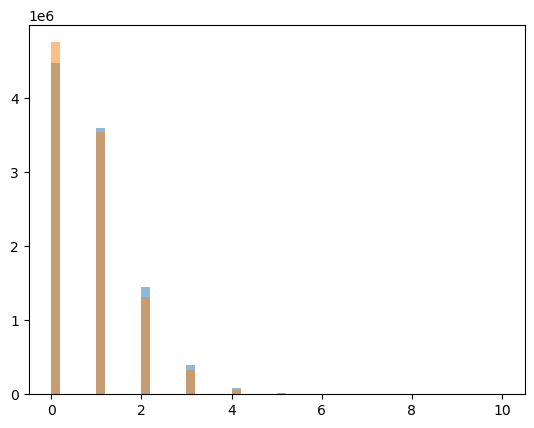

In [55]:
from scipy.stats import poisson, binom
import matplotlib.pyplot as plt
import numpy as np
nu, mu = 1.2, 3./50.
epsilon = 0.62

ndays = 10000000
nsig  = poisson.rvs(nu, size = ndays) 
nsig  = binom.rvs(nsig, epsilon, size = ndays) 
nbkg  = poisson.rvs(mu, size = ndays)
nobs  = nsig + nbkg

plt.hist(nobs, 50, (0, 10), alpha = 0.5);
plt.hist(nsig, 50, (0, 10), alpha = 0.5);

p1 = np.sum(nobs >= 1)/float(ndays)
print('probabilidad de observar >= 1 {:4.4f}'.format(p1))

A   = nobs == 1
B_A = np.logical_and((nbkg == 1), (nobs == 1))
pbkg = np.sum(B_A)/np.sum(A)
print('probilidad de que 1 evento ser espúreo {:4.4f}'.format(pbkg))

In [56]:
nueff = epsilon * nu + mu
print(nueff)
p1  = poisson.pmf(1, epsilon*nu + mu)
p0bkg = poisson.pmf(0, mu)
p1bkg = poisson.pmf(1, mu)
p0sig = poisson.pmf(0, nu*epsilon)
p1sig = poisson.pmf(1, nu*epsilon)
(p1bkg*p0sig)/(p1bkg*p0sig+ p1sig*p0bkg)

0.804


0.07462686567164178

probabilidad de observas 1 evento 0.553


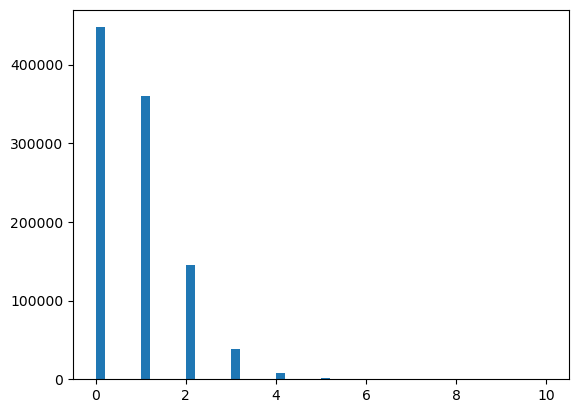

In [36]:
ndays = 1000000
nobs  = poisson.rvs(nu*epsilon + mu, size = ndays)

plt.hist(nobs, 50, (0, 10));
p1 = np.sum(nobs >= 1)/float(ndays)
print('probabilidad de observas 1 evento {:4.3f}'.format(p1))


----

**problema 8**

Estima la sección la eficaz (y sus errores estadísticos y sistemáticos) de $e+e^+ \to \pi^+ + \pi^-$ a $\sqrt{s} = 1$ GeV con los datos que obtuvo el siguiente experimento:
con una lumonisidad integrada de $\mathcal{L}_{int} = 2.43$ $\mathrm{fb}^{-1}$, se observaron 128 eventos candidatos, la eficiencia de selección se estimó en $\epsilon = 52 \pm 0.2$ % y el fondo de contaminación en $14\pm 1.8$ eventos.

La sección eficaz se espera teóricamente que sea:

$$
\sigma(s) = \frac{\pi \alpha^2}{s} \beta^3_\pi |F(s)|^2
$$

donde $\beta_\pi$ es la $\beta$ del pión, $\alpha$ la constante de estrutura fina, y $F(s)$ es un factor teórico. ¿Puedes estimar el valor y la incertidumbre de $F(s)$ a partir de las medidas del experimento?

-----

**cuestión**

Sea un colisionador con dos haces de $n$ paquetes que contienen $N$ partículas, y que recorren en anillo con una frecuencia $\nu$, al colisionar se reducen los paquetes a una sección de radio $\sigma$, ¿Cuál es la luminosidad del colisionador?


Sería:

$$
\mathcal{L} = n \nu \frac{N^2}{\pi \sigma^2}
$$

$n$ paquetes con $N$ partículas cruzan con una frecuenca $\nu$ una sección $\pi \sigma^2$ contra un blanco (el otro paquete) de $N$ partículas.